In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [39]:
df=pd.read_csv(r'coinmarketcap_06122017.csv')
df.head()

,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000,12739.500000,1,BTC,1.672352e+07
1,1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,0.036177,452.652000,2,ETH,9.616537e+07
2,2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,0.120050,1502.090000,3,BCH,1.684044e+07
3,3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,0.000424,5.307460,4,MIOTA,2.779530e+09
4,4,2.315050e+08,3.873915e+10,ripple,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,0.000019,0.241754,5,XRP,9.999309e+10


In [40]:
df.tail()

,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
1321,1321,NaN,NaN,turbocoin,1512368664,NaN,NaN,TurboCoin,NaN,NaN,8.12,1.000000e-08,0.000114,1322,TURBO,NaN
1322,1322,NaN,NaN,birds,1512535772,NaN,NaN,Birds,NaN,10.62,-42.10,1.000000e-08,0.000122,1323,BIRDS,NaN
1323,1323,NaN,NaN,bitcoincashscrypt,1512548078,NaN,NaN,BitcoinCashScrypt,-0.37,-37.39,-27.69,5.000000e-07,0.006202,1324,BCCS,2.502380e+06
1324,1324,NaN,NaN,swisscoin,1512540278,NaN,NaN,Swisscoin,NaN,4.39,-22.84,1.000000e-08,0.000123,1325,SIC,1.020000e+10
1325,1325,NaN,NaN,faceblock,1512435283,NaN,NaN,Faceblock,NaN,NaN,-6.83,1.400000e-07,0.001654,1326,FBL,1.000000e+07


In [41]:
df.shape

(1326, 16)

In [42]:
df.isnull().sum()

Unnamed: 0               0
24h_volume_usd          56
available_supply       295
id                       0
last_updated             0
market_cap_usd         295
max_supply            1111
name                     0
percent_change_1h       53
percent_change_24h      56
percent_change_7d       43
price_btc                0
price_usd                0
rank                     0
symbol                   0
total_supply           115
dtype: int64

In [43]:
for col in df.columns:
    # Check if the column has any missing values
    if df[col].isnull().sum() > 0:
        # Fill missing values with the mean of non-missing values in the same column
        mean = df[col].mean()
        df[col].fillna(mean, inplace=True)

In [44]:
df.isnull().sum()

Unnamed: 0            0
24h_volume_usd        0
available_supply      0
id                    0
last_updated          0
market_cap_usd        0
max_supply            0
name                  0
percent_change_1h     0
percent_change_24h    0
percent_change_7d     0
price_btc             0
price_usd             0
rank                  0
symbol                0
total_supply          0
dtype: int64

In [45]:
df.isnull().sum().sum()

0

In [46]:
le=LabelEncoder()
print(le)

LabelEncoder()


In [47]:
df = df.apply(LabelEncoder().fit_transform)

In [48]:
df.head()

,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,0,1262,453,128,69,1031,29,145,268,715,684,889,1214,0,181,406
1,1,1260,719,455,68,1030,124,441,241,378,313,880,1205,1,423,656
2,2,1259,455,130,93,1029,29,147,375,328,340,885,1210,2,107,408
3,3,1261,939,664,86,1028,107,609,128,1076,1163,790,1115,3,714,923
4,4,1252,983,1005,56,1027,122,976,309,389,227,466,789,4,1257,1005


In [49]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [50]:
df.head()

,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,1262,453,128,69,1031,29,145,268,715,684,889,1214,0,181,406
1,1260,719,455,68,1030,124,441,241,378,313,880,1205,1,423,656
2,1259,455,130,93,1029,29,147,375,328,340,885,1210,2,107,408
3,1261,939,664,86,1028,107,609,128,1076,1163,790,1115,3,714,923
4,1252,983,1005,56,1027,122,976,309,389,227,466,789,4,1257,1005


In [51]:
from sklearn.cluster import KMeans
dist_df = []
sse = []
for num_clust in range(1, 10):
  km  = KMeans(n_clusters=num_clust)
  km.fit(df)
  dist_df.append([num_clust, km.inertia_])

C:\Users\ymts0591\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ymts0591\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ymts0591\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ymts0591\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppre

In [52]:
!pip install kneed

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


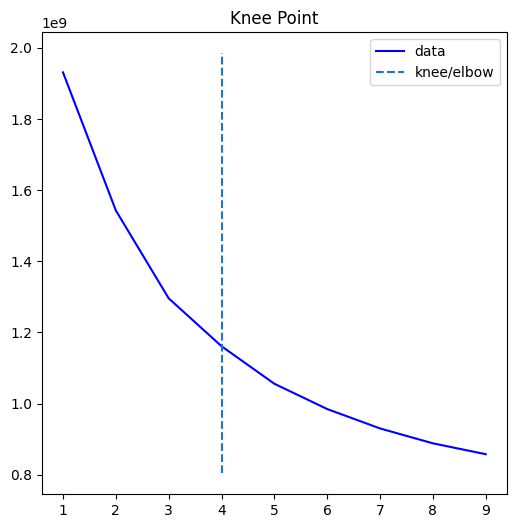

In [53]:
dist_df = pd.DataFrame(dist_df, columns=['num_of_cluster', 'distance'])
from kneed import KneeLocator
kl = KneeLocator(range(1, 10), dist_df['distance'], curve="convex", direction="decreasing")
kl.elbow

kl.plot_knee()

In [54]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df)
y_pred = kmeans.predict(df)
df['Pred'] = y_pred
df['Pred'].value_counts()

C:\Users\ymts0591\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1    663
0    663
Name: Pred, dtype: int64

<AxesSubplot: >

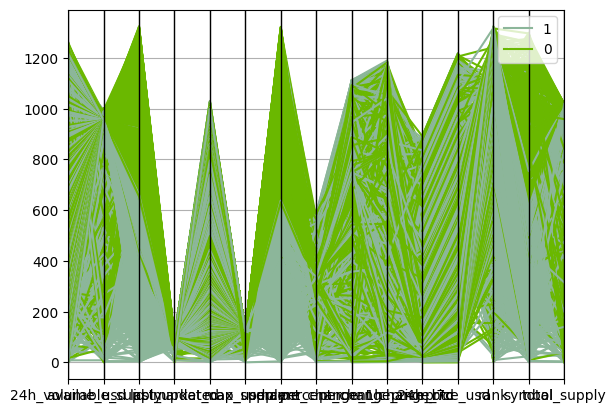

In [55]:
pd.plotting.parallel_coordinates(df, 'Pred')

In [56]:
df.head()

,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply,Pred
0,1262,453,128,69,1031,29,145,268,715,684,889,1214,0,181,406,1
1,1260,719,455,68,1030,124,441,241,378,313,880,1205,1,423,656,1
2,1259,455,130,93,1029,29,147,375,328,340,885,1210,2,107,408,1
3,1261,939,664,86,1028,107,609,128,1076,1163,790,1115,3,714,923,0
4,1252,983,1005,56,1027,122,976,309,389,227,466,789,4,1257,1005,0


In [57]:
df.to_csv("final_data.csv")

In [58]:
df.head()

,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply,Pred
0,1262,453,128,69,1031,29,145,268,715,684,889,1214,0,181,406,1
1,1260,719,455,68,1030,124,441,241,378,313,880,1205,1,423,656,1
2,1259,455,130,93,1029,29,147,375,328,340,885,1210,2,107,408,1
3,1261,939,664,86,1028,107,609,128,1076,1163,790,1115,3,714,923,0
4,1252,983,1005,56,1027,122,976,309,389,227,466,789,4,1257,1005,0


In [59]:
df.Pred.value_counts()

1    663
0    663
Name: Pred, dtype: int64

In [60]:
x=df.drop('Pred',axis=1)
x

,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,1262,453,128,69,1031,29,145,268,715,684,889,1214,0,181,406
1,1260,719,455,68,1030,124,441,241,378,313,880,1205,1,423,656
2,1259,455,130,93,1029,29,147,375,328,340,885,1210,2,107,408
3,1261,939,664,86,1028,107,609,128,1076,1163,790,1115,3,714,923
4,1252,983,1005,56,1027,122,976,309,389,227,466,789,4,1257,1005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321,1216,955,1196,10,999,124,1162,337,749,536,22,55,1321,1109,1019
1322,1216,955,112,43,999,124,123,337,790,58,22,63,1322,123,1019
1323,1216,955,140,54,999,124,158,225,28,118,68,271,1323,104,140
1324,1216,955,1132,48,999,124,1100,337,643,152,22,65,1324,985,959


In [61]:
y=df['Pred']
y

0       1
1       1
2       1
3       0
4       0
       ..
1321    0
1322    1
1323    1
1324    0
1325    1
Name: Pred, Length: 1326, dtype: int32

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 101, test_size = 0.3)

In [63]:
x_train

,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
429,933,824,381,62,590,94,377,328,704,825,108,363,429,345,834
1160,429,955,1319,79,999,124,1285,234,577,427,226,530,1160,1279,295
68,1151,98,560,82,962,124,544,310,248,629,867,1192,68,518,315
586,831,406,593,80,407,55,577,21,80,137,253,560,586,561,360
384,1146,386,24,98,638,124,32,433,569,218,536,861,384,71,433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,415,462,332,61,423,124,334,316,775,908,238,546,575,356,414
973,264,170,1321,71,70,124,1288,305,749,683,108,364,973,1291,143
75,1077,248,185,62,955,124,188,270,244,406,841,1166,75,144,205
599,487,381,1216,80,388,124,1184,24,326,242,248,555,599,1125,461


In [64]:
y_train

429     1
1160    0
68      1
586     1
384     1
       ..
575     1
973     0
75      1
599     0
863     0
Name: Pred, Length: 928, dtype: int32

In [65]:
x_test

,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
1101,698,955,1015,87,999,124,985,306,234,0,22,69,1101,1258,973
446,748,647,508,94,571,88,466,77,368,953,234,539,446,459,632
501,764,790,147,74,509,124,163,15,23,1172,84,309,501,185,733
1286,16,955,1186,74,999,124,1154,304,793,829,113,375,1286,1097,1019
497,812,144,346,87,513,19,346,180,596,1106,614,939,497,339,118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,997,700,289,93,705,68,223,198,852,987,334,650,318,262,747
752,533,70,982,75,46,124,957,520,1004,1016,199,499,752,1254,53
274,786,831,1291,96,754,124,1261,11,559,1060,237,545,274,1242,877
858,319,276,898,57,260,124,875,307,797,752,204,505,858,838,231


In [66]:
y_test

1101    0
446     1
501     1
1286    0
497     1
       ..
318     1
752     0
274     0
858     0
943     1
Name: Pred, Length: 398, dtype: int32

In [67]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier(random_state=12345)
dt = dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
acc_dts=accuracy_score(y_test,y_pred)
acc_dts

0.9673366834170855

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf = rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
acc_rf=accuracy_score(y_test,y_pred)
acc_rf

0.9723618090452262

In [69]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
adb = adb.fit(x_train,y_train)
y_pred = adb.predict(x_test)
acc_adb=accuracy_score(y_test,y_pred)
acc_adb

0.9824120603015075

In [70]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp = mlp.fit(x_train,y_train)
y_pred = mlp.predict(x_test)
acc_mlp=accuracy_score(y_test,y_pred)
acc_mlp

0.9396984924623115

In [71]:
from sklearn.ensemble import ExtraTreesClassifier
ets = ExtraTreesClassifier()
ets = ets.fit(x_train,y_train)
y_pred = ets.predict(x_test)
acc_ets=accuracy_score(y_test,y_pred)
acc_ets

0.9849246231155779

In [72]:
abc=[933,	824,	381,	62,	590,	94,	377,	328,	704,	825,	108,	363,	429,	345,	834]
result=ets.predict([abc])
result=result[0]
if result==0:
    print("Financial Risk-Type == No-Risk Found")
else:
    print("Financial Risk-Type == Risk Found")

Financial Risk-Type == Risk Found


C:\Users\ymts0591\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


In [73]:
abc=[429,	955,	1319,	79,	999,	124,	1285,	234,	577,	427,	226,	530,	1160,	1279,	295]
result=ets.predict([abc])
result=result[0]
if result==0:
    print("Financial Risk-Type == No-Risk Found")
else:
    print("Financial Risk-Type == Risk Found")

Financial Risk-Type == No-Risk Found


C:\Users\ymts0591\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


In [75]:
graph = pd.DataFrame({'Models':['DecisionTreeClassifier','RandomForestClassifier','AdaBoostClassifier','MLPClassifier','ExtraTreesClassifier'],'Accuracy':[acc_dts*100,acc_rf*100,acc_adb*100,acc_mlp*100,acc_ets*100]})
graph

,Models,Accuracy
0,DecisionTreeClassifier,96.733668
1,RandomForestClassifier,97.236181
2,AdaBoostClassifier,98.241206
3,MLPClassifier,93.969849
4,ExtraTreesClassifier,98.492462


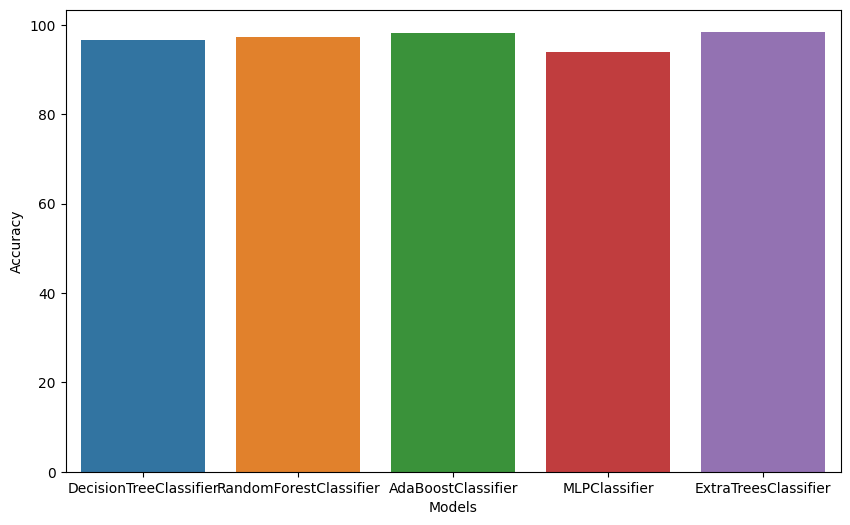

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,6))
sns.barplot(y = graph.Accuracy,x = graph.Models)
plt.xticks(rotation = 'horizontal')
plt.show()